### Exploratory Data Analysis on Retail sales data

You are given a typical Order processing dataset of a retail company. You need to use python data libraries to look into the dataset to gain insight of data and identify interesting trends/patterns.



### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')

### Data Cleaning
Removing Null Values

In [5]:
# load the data in structure format
sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')
print(sales_df.isnull().sum())

#drop missing values
sales_df.dropna(inplace=True)
sales_df.drop_duplicates(inplace=True) #Removing duplicate values
print('\n',sales_df.head())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [24]:
sales_df[sales_df['Quantity']*sales_df['Price per Unit'] == sales_df['Total Amount']] # Check duplicate values

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [6]:
# Print Rows and Columns
sales_df.shape

(1000, 9)

In [7]:
sales_df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [12]:
# Clean Data Type 
sales_df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [14]:
sales_df['Total Amount'] = sales_df['Total Amount'].astype('float')

In [15]:
sales_df.dtypes

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Quantity              int64
Price per Unit        int64
Total Amount        float64
dtype: object

### Descriptive Statistics

In [6]:
import pandas as pd

#load the data
sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')

#Calculate the statistics
mean_values = sales_df[['Quantity','Price per Unit','Total Amount']].mean()
median_values = sales_df[['Quantity','Price per Unit','Total Amount']].median()
mode_values = sales_df[['Quantity','Price per Unit','Total Amount']].mean()

#standard Deviation
std_dev = sales_df[['Quantity','Price per Unit','Total Amount']].std()

print('Mean Values: ')
print(mean_values)
print('\nMedian Values: ')
print(median_values)
print('\nMode values: ')
print(mode_values)
print('\nStandard Deviation: ')
print(std_dev)

Mean Values: 
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median Values: 
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode values: 
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Standard Deviation: 
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


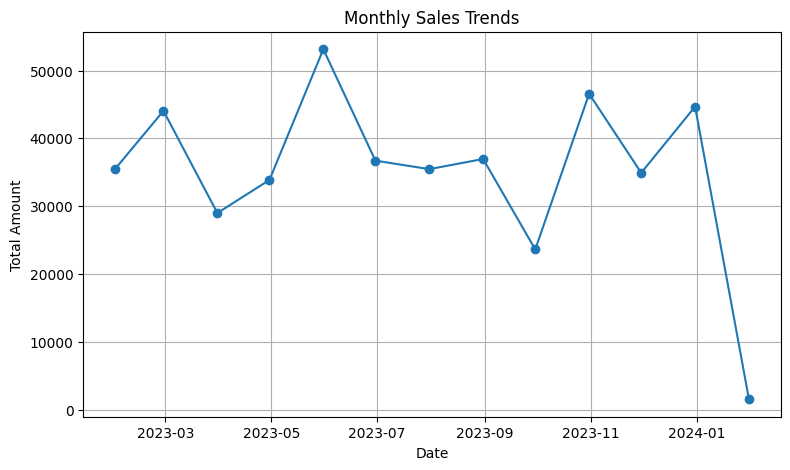

In [7]:
# Analyse sales trends, time series techniques
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

monthly_sales = sales_df.resample('M', on='Date').sum() # monthly frequency

#Visualization the time series

plt.figure(figsize=(9,5))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'],marker='o',linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)

plt.show()
 

In [8]:
import matplotlib.pyplot as plt
sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')
gender_count = sales_df['Gender'].value_counts()
gender_count

Gender
Female    510
Male      490
Name: count, dtype: int64

In [23]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [25]:
sales_df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


### Data Visualization

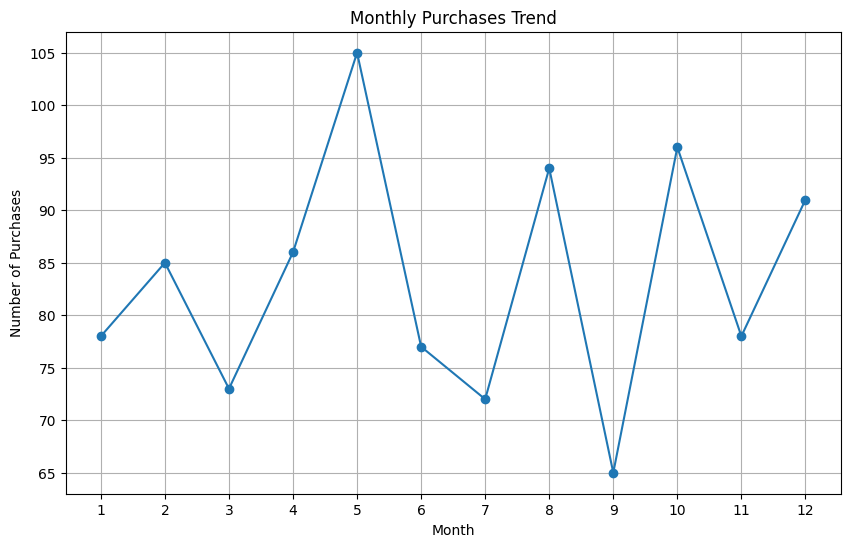

In [59]:
import matplotlib.pyplot as plt
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Month'] = sales_df['Date'].dt.month
monthly_purchase = sales_df.groupby('Month').size()

#line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_purchase.index, monthly_purchase.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchases Trend')
plt.xticks(monthly_purchase.index)  # Ensure all months are shown on x-axis
plt.grid(True)
plt.show()

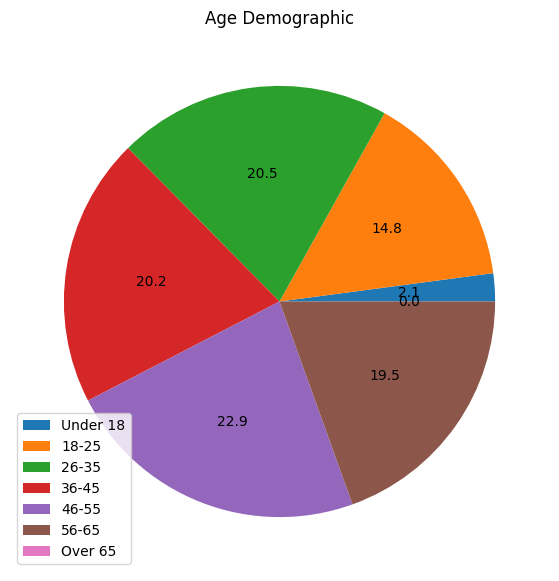

In [52]:
age_group = pd.cut(sales_df['Age'],bins=[0, 18, 25, 35, 45, 55, 65, 100], labels = ['Under 18', '18-25', '26-35', '36-45','46-55','56-65', 'Over 65']) 
age_demograph = sales_df.groupby(age_group, observed = False).size()
# pie chart
plt.figure(figsize = (8, 7))
age_demograph.plot(kind = 'pie', autopct = '%1.1f', labels = None)
plt.title('Age Demographic')
plt.ylabel('')
plt.legend(age_demograph.index, loc = 'best')
plt.show()


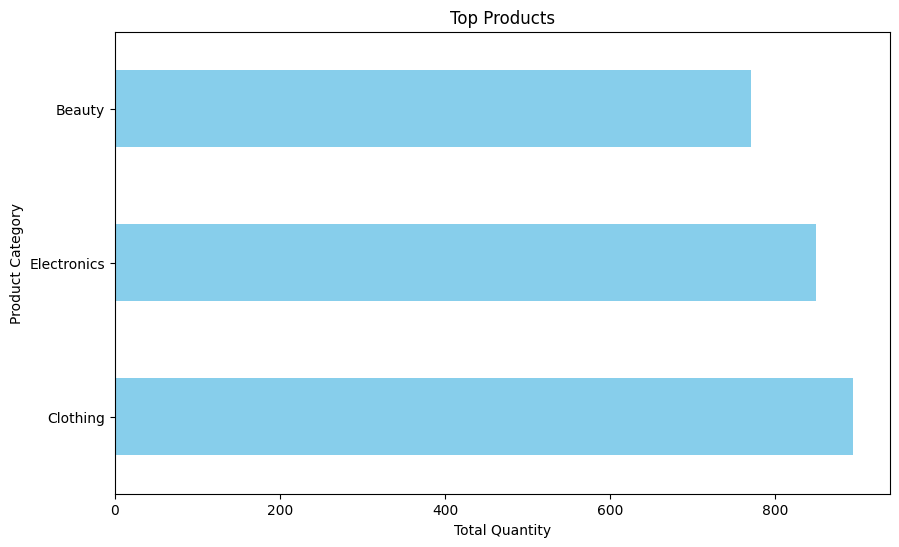

In [58]:
top_products = sales_df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
#Bar plot
plt.figure(figsize =(10,6))
top_products.plot(kind='barh',color='skyblue')
plt.xlabel('Total Quantity')
plt.ylabel('Product Category')
plt.title('Top Products')
plt.show() 

### Data Exploration

In [70]:
sales_df.groupby(['Product Category']).agg({'Quantity':'sum'}).reset_index()

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [71]:
sales_df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')

<Axes: xlabel='Product Category', ylabel='Total Amount'>

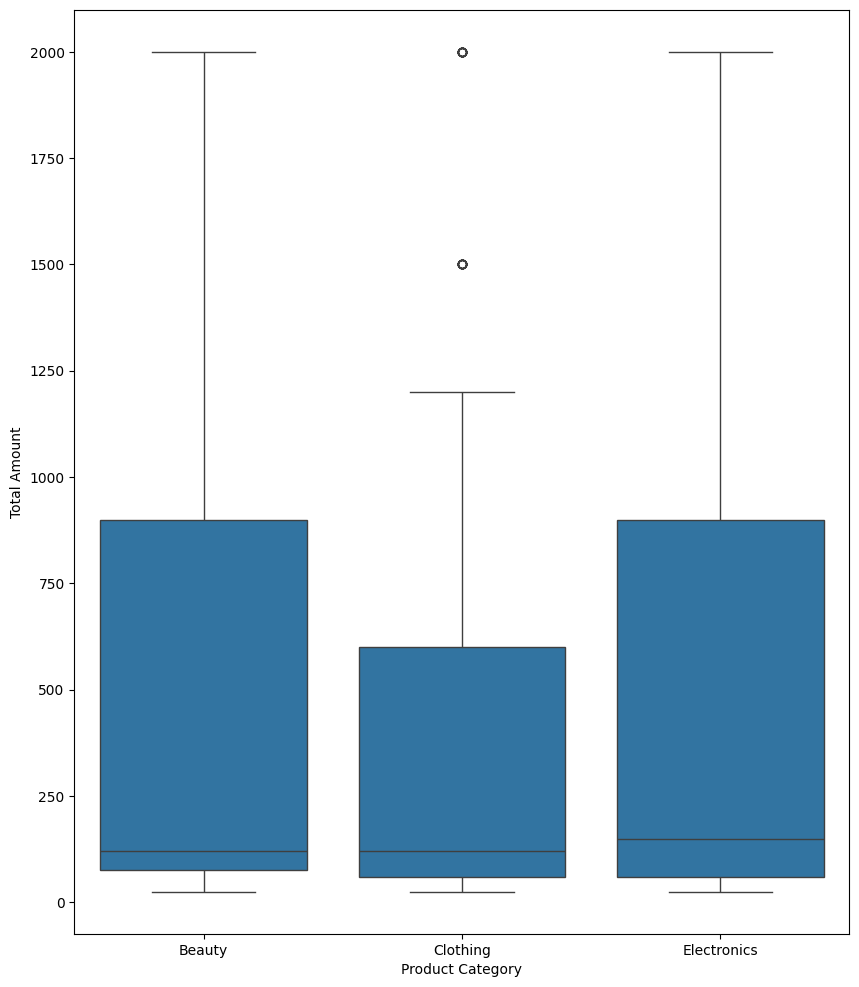

In [80]:
plt.figure(figsize = (10,12))
sns.boxplot(y = sales_df['Total Amount'], x = sales_df['Product Category'])

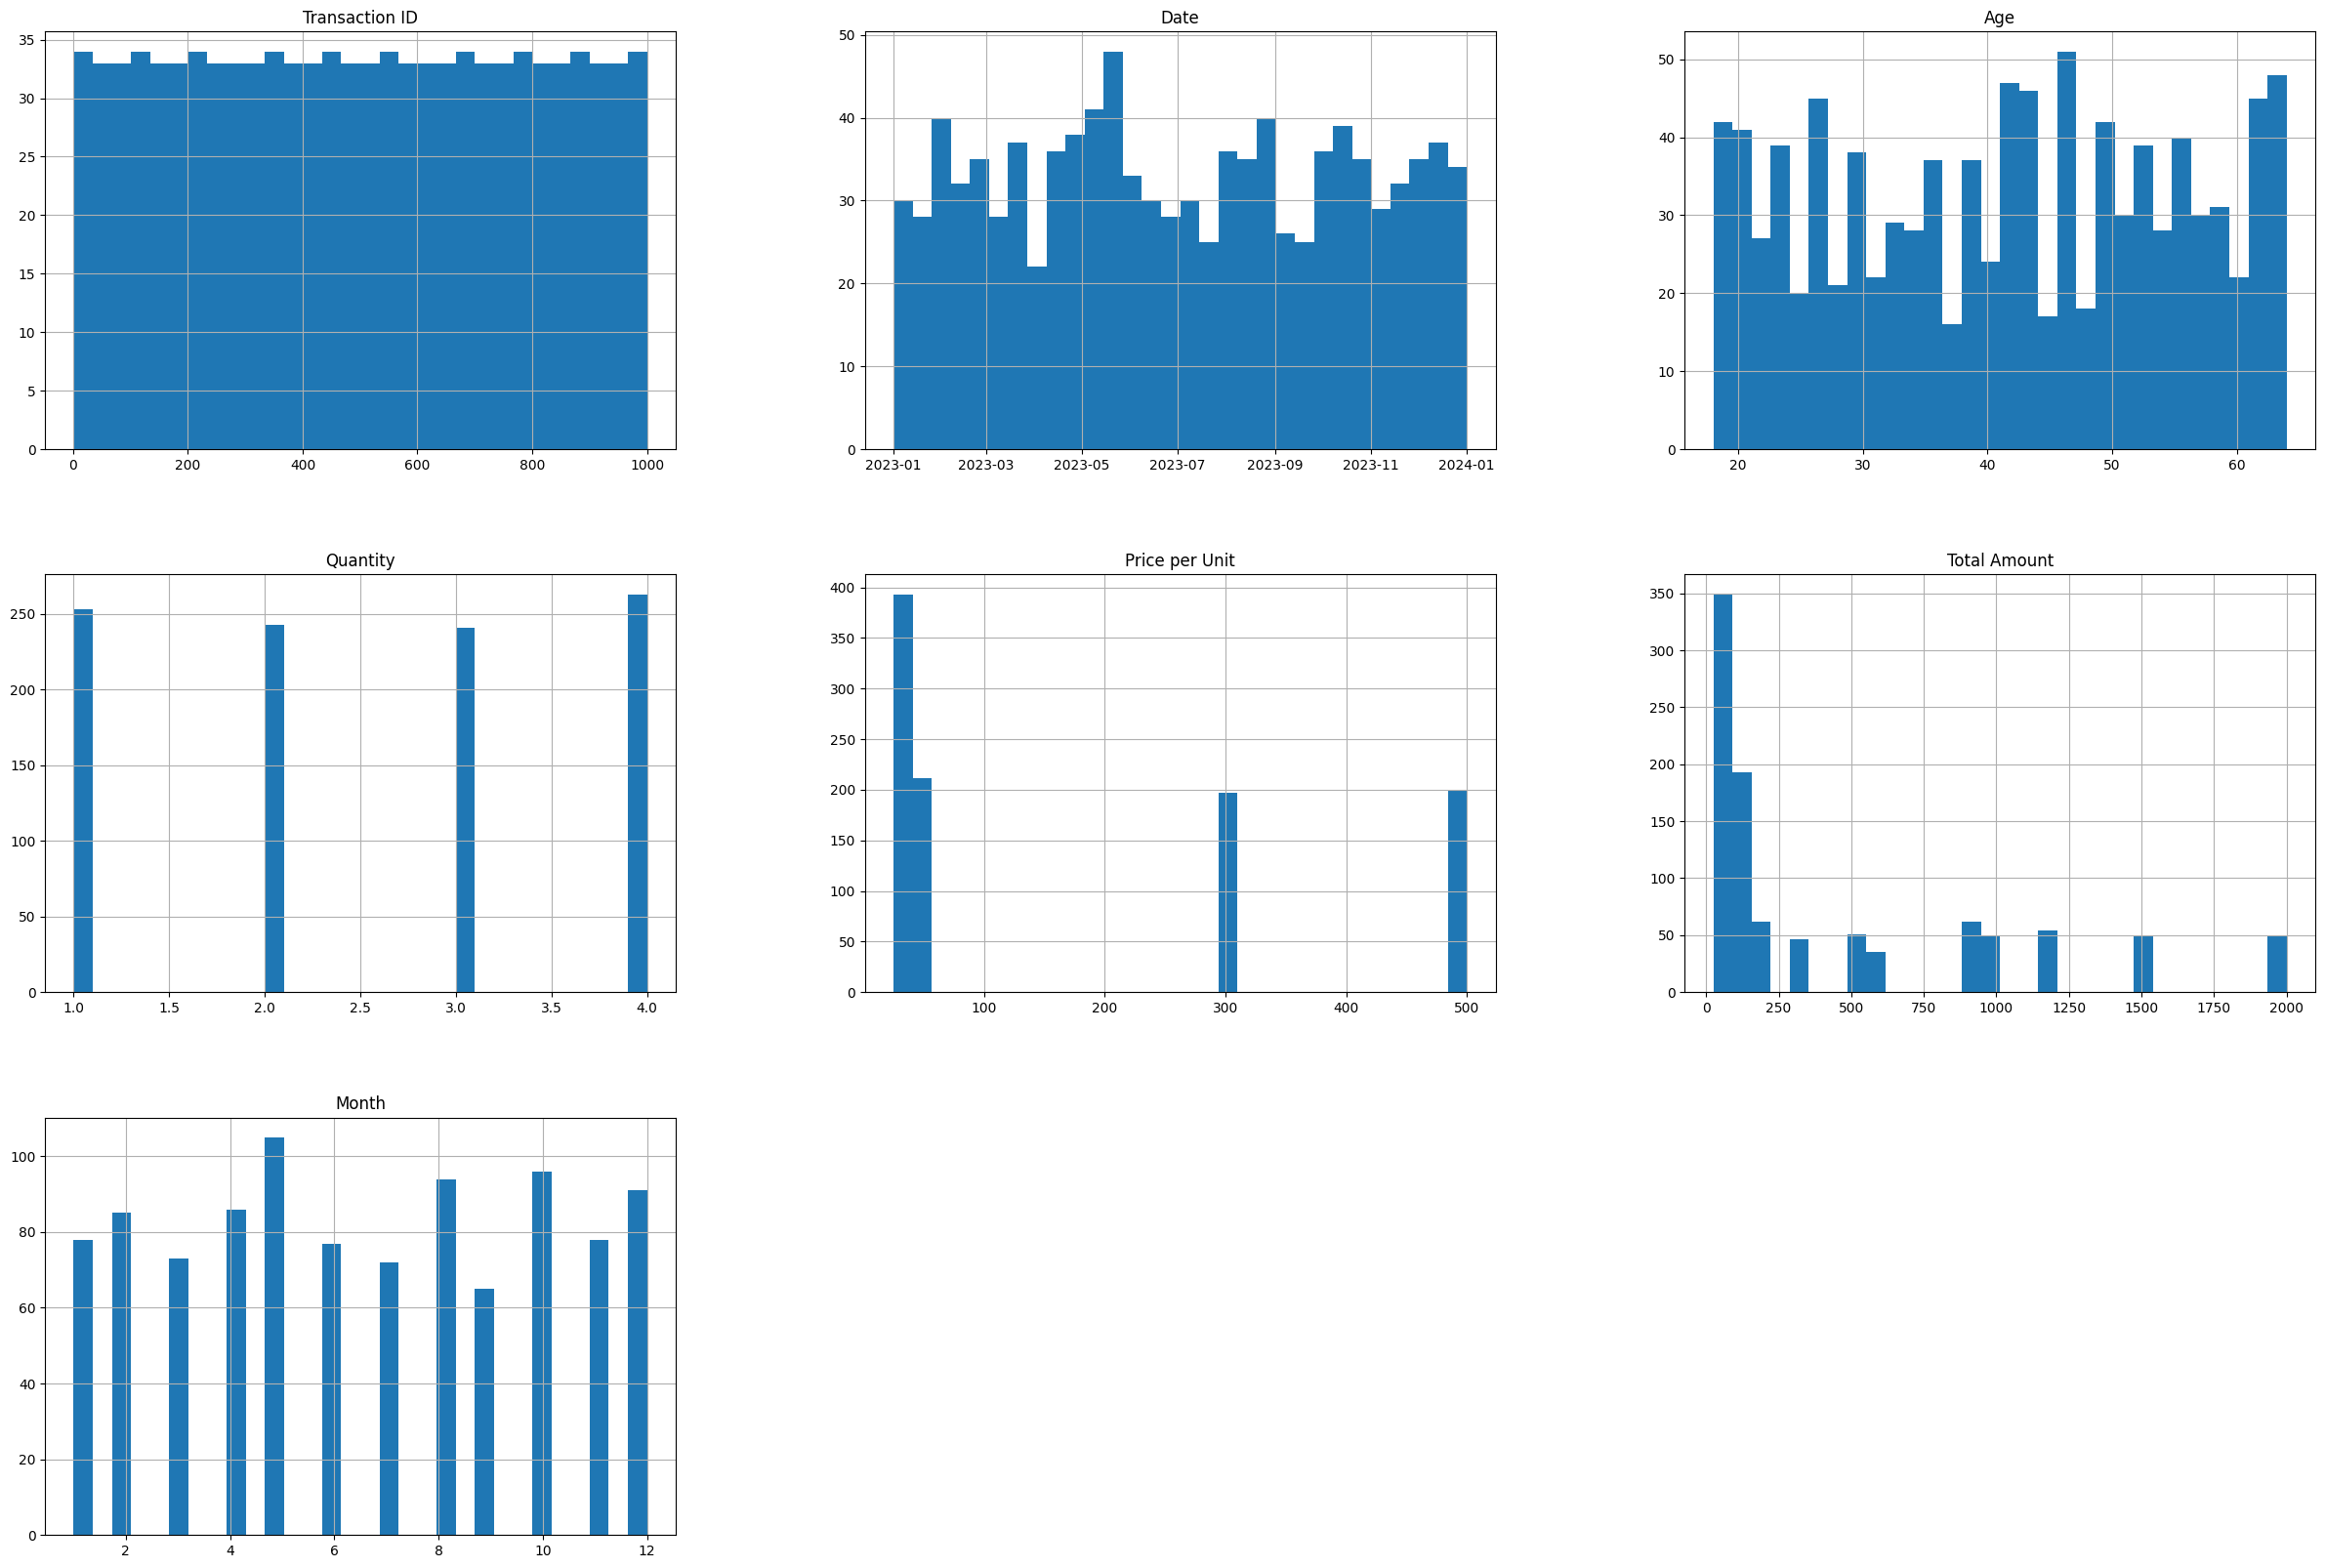

In [81]:
# Plot the histogram of each
sales_df.hist( bins = 30, figsize = (30,20))
plt.show()

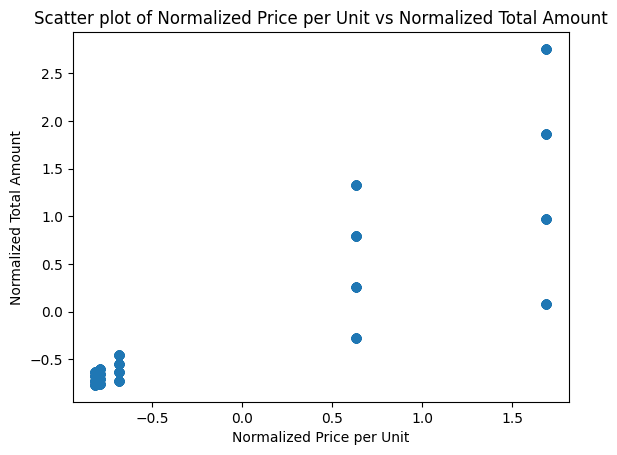

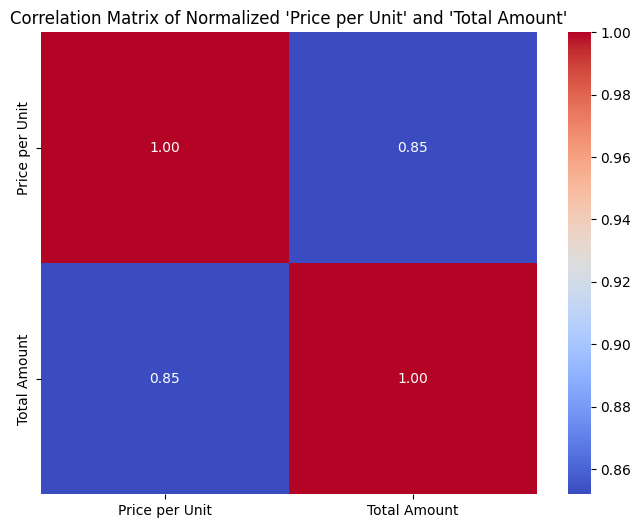

Correlation between normalized 'Price per Unit' and normalized 'Total Amount': 0.8519248403554033
Outliers:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV file into a DataFrame
sales_df = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\retail_sales_dataset.csv')

# Normalize the columns 'Price per Unit' and 'Total Amount' using z-score normalization
sales_df['Price per Unit'] = (sales_df['Price per Unit'] - sales_df['Price per Unit'].mean()) / sales_df['Price per Unit'].std()
sales_df['Total Amount'] = (sales_df['Total Amount'] - sales_df['Total Amount'].mean()) / sales_df['Total Amount'].std()

# Calculate the correlation between normalized 'Price per Unit' and 'Total Amount'
correlation = sales_df['Price per Unit'].corr(sales_df['Total Amount'])

# Plotting a scatter plot to visualize the relationship between normalized 'Price per Unit' and 'Total Amount'
plt.scatter(sales_df['Price per Unit'], sales_df['Total Amount'])
plt.xlabel('Normalized Price per Unit')
plt.ylabel('Normalized Total Amount')
plt.title('Scatter plot of Normalized Price per Unit vs Normalized Total Amount')
plt.show()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = sales_df[['Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Normalized 'Price per Unit' and 'Total Amount'")
plt.show()

# Detecting outliers using z-score method on normalized data
z_scores = stats.zscore(sales_df[['Price per Unit', 'Total Amount']])
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).any(axis=1)
outliers = sales_df[outlier_rows]

print("Correlation between normalized 'Price per Unit' and normalized 'Total Amount':", correlation)
print("Outliers:")
print(outliers)
